# Customer Segmentation with K-Means

This notebook explores how to segment e-commerce customers based on their behavior using the K-Means clustering algorithm.

We will:
- Understand how K-Means works
- Use the Elbow Method to find the optimal number of clusters
- Evaluate the clustering results using Silhouette Score
- Visualize and interpret the customer segments


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

## 2. Load and Explore Dataset

In [ ]:
# Load dataset
df = pd.read_csv('e_commerce_customer_behavior.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## 3. Select Relevant Features

In [3]:
# Select numerical features for clustering
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
data = df[features]

## 4. Data Preprocessing

In [4]:
# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## 5. Determine Optimal Number of Clusters (Elbow Method)

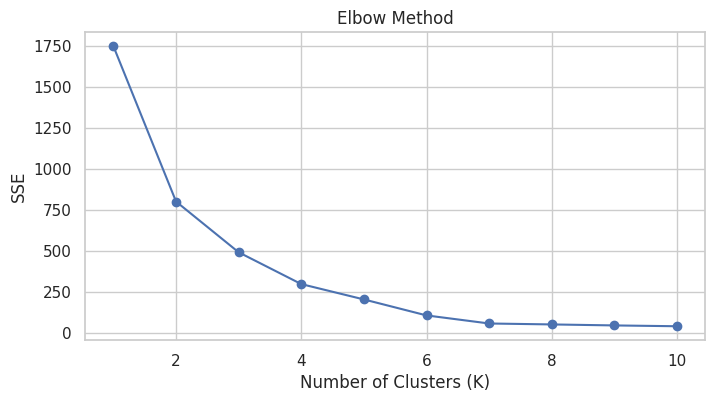

In [5]:
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

## 6. Apply K-Means Clustering

In [6]:
# Choose optimal K (e.g., 3 based on elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

## 7. Evaluate Clustering with Silhouette Score

In [7]:
score = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.49


## 8. Visualize Customer Segments

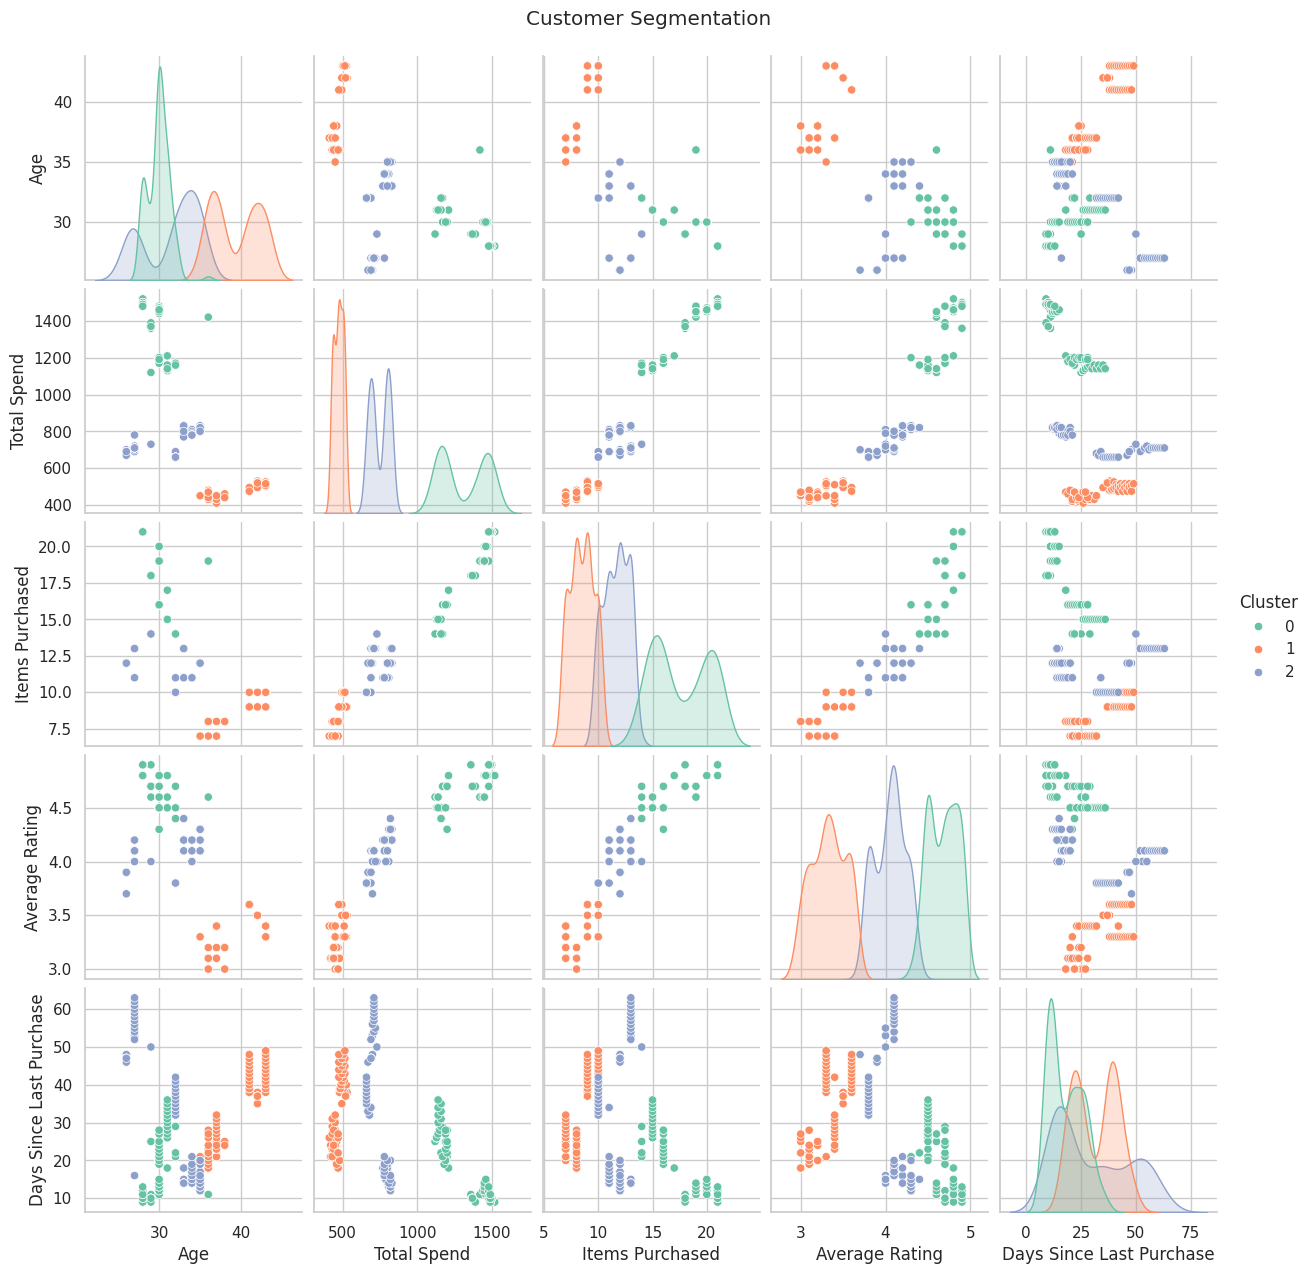

In [8]:
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set2')
plt.suptitle("Customer Segmentation", y=1.02)
plt.show()

## 9. Identify Customer Profiles

We analyze each cluster to understand its characteristics and label profiles such as "seasonal buyers" or "high-value customers".

In [9]:
cluster_profiles = df.groupby('Cluster')[features].mean().round(2)
cluster_profiles

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Cluster,,,,,
0,29.92,1311.14,17.62,4.68,17.94
1,39.36,473.39,8.49,3.32,31.61
2,31.56,748.43,11.66,4.05,30.26


### Profile Interpretation

Based on the average metrics for each cluster:

- **Cluster 0**: High spenders, frequent buyers with high satisfaction – likely **"high-value customers"**.
- **Cluster 1**: Lower spend, longer since last purchase – possibly **"seasonal buyers"** or **"at-risk customers"**.
- **Cluster 2**: Younger age, average spend and activity – may represent **"new or occasional customers"**.

## 10. Conclusion

In this notebook, we successfully segmented customers into distinct groups using K-Means. This segmentation can help target marketing strategies based on purchasing behavior and engagement.